In [1]:
from google.colab import drive
drive.mount('/content/drive')
!sudo apt update
!sudo apt install -y tesseract-ocr

!wget https://github.com/tesseract-ocr/tessdata/raw/main/hrv.traineddata
!wget https://github.com/tesseract-ocr/tessdata/raw/main/srp.traineddata
!wget https://github.com/tesseract-ocr/tessdata/raw/main/bos.traineddata
!sudo mv hrv.traineddata /usr/share/tesseract-ocr/4.00/tessdata/
!sudo mv srp.traineddata /usr/share/tesseract-ocr/4.00/tessdata/
!sudo mv bos.traineddata /usr/share/tesseract-ocr/4.00/tessdata/

!pip install pytesseract
!sudo apt install -y tesseract-ocr-bos
!sudo apt install -y tesseract-ocr-hrv tesseract-ocr-srp tesseract-ocr-bos
import pytesseract

pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'



Mounted at /content/drive
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,858 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,084 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://

In [2]:
import cv2
import numpy as np
import pytesseract

from google.colab.patches import cv2_imshow

def read_letter(path):
  # Load the img
  img = cv2.imread(path)

  # Cvt to hsv
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

  # Get binary-mask
  msk = cv2.inRange(hsv, np.array([0, 0, 175]), np.array([179, 255, 255]))
  krn = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 3))
  dlt = cv2.dilate(msk, krn, iterations=1)
  thr = 255 - cv2.bitwise_and(dlt, msk)

  # OCR
  e= pytesseract.image_to_string(thr,  lang='hrv',config='--psm 10 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789ŽČĆĐŠ')
  res=e[0]
  if res=='\x0c':
    res='-'
  return res

In [34]:
pr="drive/MyDrive/segmenti/primjer2.png/segment2.png"
print(read_letter(pr))

G


In [7]:
import os

folders=sorted(os.listdir("drive/MyDrive/segmenti"))
results=[]
for folder in folders:
  letters=sorted(os.listdir(f"drive/MyDrive/segmenti/{folder}"))
  res=[]
  for letter in letters:
    path_to_letter=f"drive/MyDrive/segmenti/{folder}/{letter}"
    res.append(read_letter(path_to_letter))
  results.append((folder, res))
print(results)


[('primjer1.png', ['Ž', 'G', '6', '6', '5', '2', 'J', 'N']), ('primjer10.png', ['V', 'Ž', '3', '3', '-', 'N', 'H']), ('primjer11.png', ['V', 'K', '8', '4', '4', 'E', 'N']), ('primjer12.png', ['Ž', 'G', '3', '6', '-', '1', 'Ž']), ('primjer13.png', ['Ž', 'G', '7', '7', '8', '1', 'J', 'D']), ('primjer14.png', ['Ž', 'G', '8', '1', '5', '0', 'J', 'D']), ('primjer15.png', ['V', 'K', '1', '2', '-', 'E', 'J']), ('primjer16.png', ['Ž', 'G', '7', '-', '6', '-', 'G', 'F']), ('primjer17.png', ['D', 'U', '8', '8', '3', 'R', 'Ž']), ('primjer18.png', ['V', 'K', '2', '4', '0', 'F', 'Ž']), ('primjer19.png', ['Ž', 'G', '5', '6', '7', '5', 'U']), ('primjer2.png', ['Ž', 'G', '7', '-', '3', '4', 'F', 'L']), ('primjer20.png', ['Ž', 'G', '1', '5', '2', '6', 'F', 'Ž']), ('primjer21.png', ['Ž', 'G', '7', '8', '6', '0', 'D', 'H']), ('primjer22.png', ['Ž', 'G', '7', '7', '8', '0', 'J', 'L']), ('primjer23.png', ['D', 'U', '7', '5', '8', 'Ž', 'R']), ('primjer24.png', ['Ž', 'G', '2', '6', '3', '6', 'J', 'F']), ('pr

In [8]:
import pandas as pd
import itertools


df=pd.read_csv("drive/MyDrive/oznake.csv")
df_sorted = df.sort_values(by='ime_datoteke')
print(df_sorted)
split_results = df_sorted[' oznaka'].apply(list)
print(split_results)

# Flatten the list of lists into a single list
flattened_list = list(itertools.chain(*split_results))

# Print the flattened list
flattened_list = [char for char in flattened_list if char != ' ']
print(flattened_list)


     ime_datoteke     oznaka
0    primjer1.png   ZG6652JN
8   primjer10.png    VŽ330NH
9   primjer11.png    VK844EN
10  primjer12.png   ZG3601IZ
11  primjer13.png   ZG7781JB
12  primjer14.png   ZG8159JP
13  primjer15.png    VK120EJ
14  primjer16.png   ZG7060GF
15  primjer17.png    PU883RZ
16  primjer18.png    VK249FZ
17  primjer19.png    ZG5675U
1    primjer2.png   ZG7034FL
18  primjer20.png   ZG1526FZ
19  primjer21.png   ZG7869BH
20  primjer22.png   ZG7789JL
21  primjer23.png    PU758ZR
22  primjer24.png   ZG2636JF
23  primjer25.png    VK203GG
24  primjer26.png   ZG1072IV
25  primjer27.png   ZG9743HJ
26  primjer28.png    OS990OP
27  primjer29.png   ZG2399EE
28  primjer30.png   ZG2043DR
29  primjer31.png   ZG1950JJ
30  primjer32.png   ZG1803DL
31  primjer33.png   RIPV5296
32  primjer34.png   STPV2016
33  primjer35.png    IMPV911
34  primjer36.png    SB672IK
35  primjer37.png    KC440IG
36  primjer38.png    VŽ330NH
37  primjer39.png    PU883RZ
2    primjer4.png   PU2014EC
38  primjer40.

In [12]:
from collections import Counter

true=flattened_list
predicted=[]
for key, val in results:
  predicted.extend(val)

counter=Counter(true)
print(counter['I'])

for index, value in enumerate(true):
    if value == 'I':
        predicted.insert(index, '-')

print(true)
print(predicted)
print(len(true))
print(len(predicted))

10
['Z', 'G', '6', '6', '5', '2', 'J', 'N', 'V', 'Ž', '3', '3', '0', 'N', 'H', 'V', 'K', '8', '4', '4', 'E', 'N', 'Z', 'G', '3', '6', '0', '1', 'I', 'Z', 'Z', 'G', '7', '7', '8', '1', 'J', 'B', 'Z', 'G', '8', '1', '5', '9', 'J', 'P', 'V', 'K', '1', '2', '0', 'E', 'J', 'Z', 'G', '7', '0', '6', '0', 'G', 'F', 'P', 'U', '8', '8', '3', 'R', 'Z', 'V', 'K', '2', '4', '9', 'F', 'Z', 'Z', 'G', '5', '6', '7', '5', 'U', 'Z', 'G', '7', '0', '3', '4', 'F', 'L', 'Z', 'G', '1', '5', '2', '6', 'F', 'Z', 'Z', 'G', '7', '8', '6', '9', 'B', 'H', 'Z', 'G', '7', '7', '8', '9', 'J', 'L', 'P', 'U', '7', '5', '8', 'Z', 'R', 'Z', 'G', '2', '6', '3', '6', 'J', 'F', 'V', 'K', '2', '0', '3', 'G', 'G', 'Z', 'G', '1', '0', '7', '2', 'I', 'V', 'Z', 'G', '9', '7', '4', '3', 'H', 'J', 'O', 'S', '9', '9', '0', 'O', 'P', 'Z', 'G', '2', '3', '9', '9', 'E', 'E', 'Z', 'G', '2', '0', '4', '3', 'D', 'R', 'Z', 'G', '1', '9', '5', '0', 'J', 'J', 'Z', 'G', '1', '8', '0', '3', 'D', 'L', 'R', 'I', 'P', 'V', '5', '2', '9', '6', '

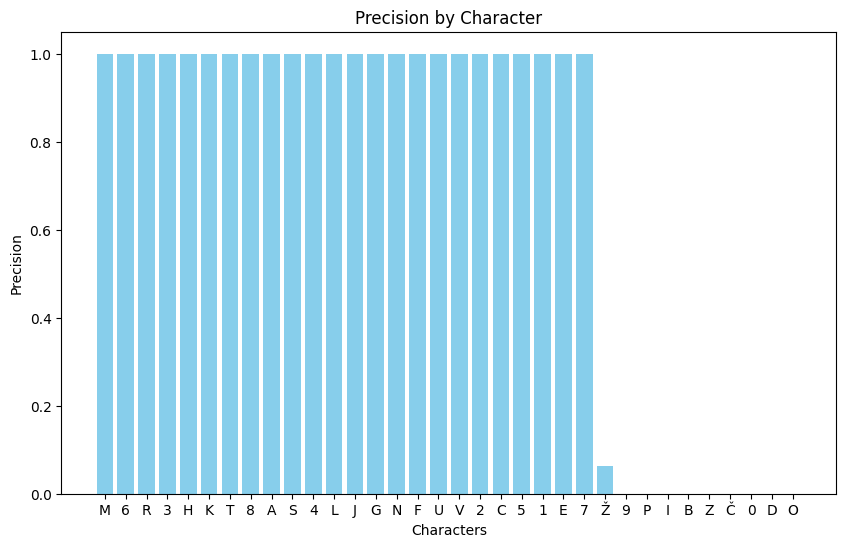

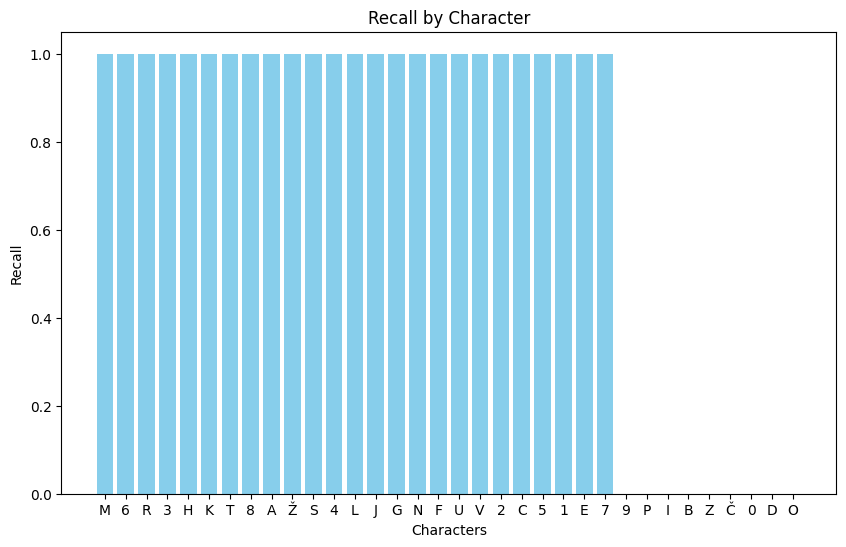

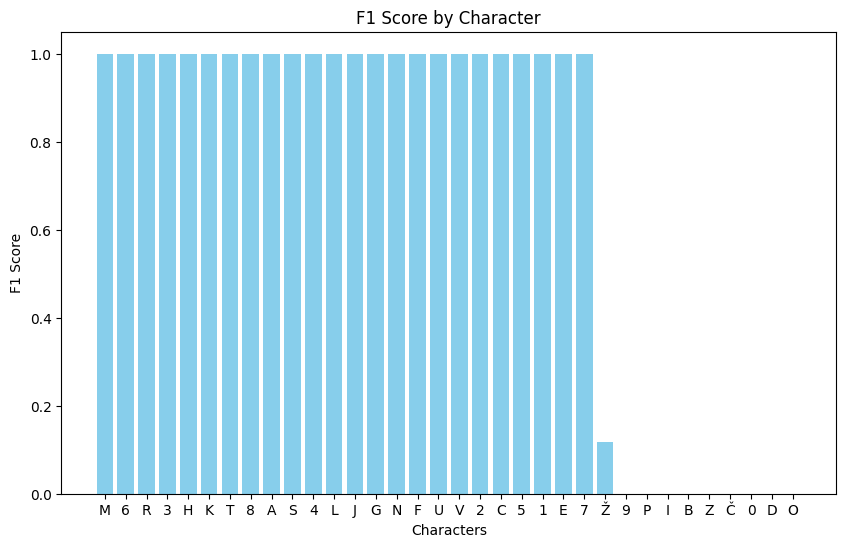

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

unique_chars = set(true)
precision_scores = {}
recall_scores = {}
f1_scores = {}

for char in unique_chars:
    true_binary = np.array([1 if t == char else 0 for t in true])
    predicted_binary = np.array([1 if p == char else 0 for p in predicted])

    precision = precision_score(true_binary, predicted_binary, zero_division=0)
    recall = recall_score(true_binary, predicted_binary)
    f1 = f1_score(true_binary, predicted_binary)

    precision_scores[char] = precision
    recall_scores[char] = recall
    f1_scores[char] = f1

# Step 3: Sort the scores from highest to lowest
sorted_precision_scores = dict(sorted(precision_scores.items(), key=lambda item: item[1], reverse=True))
sorted_recall_scores = dict(sorted(recall_scores.items(), key=lambda item: item[1], reverse=True))
sorted_f1_scores = dict(sorted(f1_scores.items(), key=lambda item: item[1], reverse=True))

# Step 4: Plot the sorted bar graphs for precision, recall, and F1 scores
def plot_scores(scores, title):
    plt.figure(figsize=(10, 6))
    plt.bar(scores.keys(), scores.values(), color='skyblue')
    plt.xlabel('Characters')
    plt.ylabel(title)
    plt.title(f'{title} by Character')
    plt.show()

plot_scores(sorted_precision_scores, 'Precision')
plot_scores(sorted_recall_scores, 'Recall')
plot_scores(sorted_f1_scores, 'F1 Score')

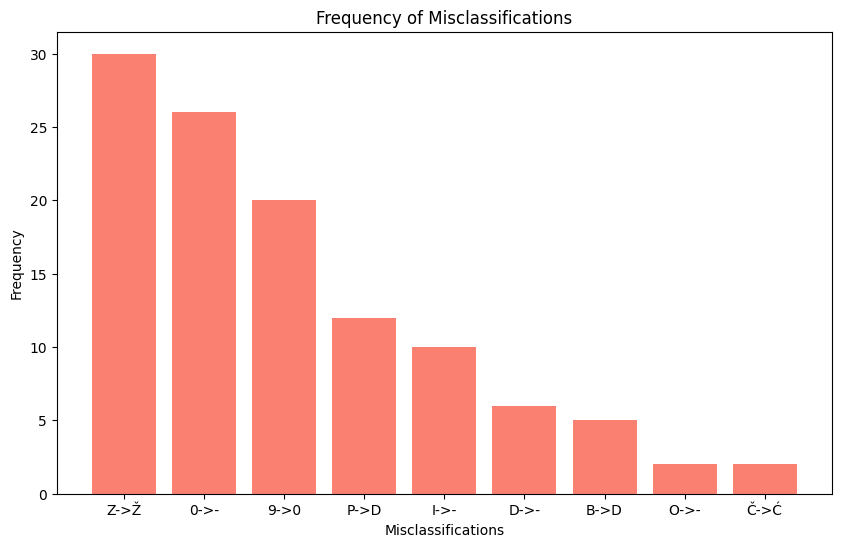

In [15]:
# Step 1: Identify misclassifications
misclassifications = [(t, p) for t, p in zip(true, predicted) if t != p]

# Step 2: Count the frequency of each misclassification
misclassification_counts = Counter(misclassifications)

# Step 3: Sort the misclassifications by frequency
sorted_misclassifications = dict(sorted(misclassification_counts.items(), key=lambda item: item[1], reverse=True))

# Step 4: Plot the sorted frequencies on a bar plot
misclassification_labels = [f'{t}->{p}' for t, p in sorted_misclassifications.keys()]
misclassification_values = list(sorted_misclassifications.values())

plt.figure(figsize=(10, 6))
plt.bar(misclassification_labels, misclassification_values, color='salmon')
plt.xlabel('Misclassifications')
plt.ylabel('Frequency')
plt.title('Frequency of Misclassifications')
plt.show()

In [16]:
correct_count = sum(t == p for t, p in zip(true, predicted))

# Step 2: Calculate the total number of samples
total_count = len(true)

# Step 3: Calculate the accuracy
accuracy = correct_count / total_count

# Print the result
print(f'Accuracy: {accuracy:.2%}')  # Print accuracy as a percentage

Accuracy: 69.29%
